In [1]:
import torch 
import torch.nn as nn
import torch.optim as optim 
import torchvision.datasets as dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as f
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor


In [2]:
 train_ds=dataset.CIFAR10(
        root="data",
        train=True,
        download=True,
        transform=ToTensor()


    )

test_ds=dataset.CIFAR10(
        root="data",
        train=False,
        download=True,
        transform=ToTensor()


    )

100%|██████████| 170498071/170498071 [00:36<00:00, 4712221.72it/s]


Extracting data\cifar-10-python.tar.gz to data
Files already downloaded and verified


In [3]:
print(train_ds.data.shape)
print(test_ds.data.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
Batch_size=16
train_dl=DataLoader(dataset=train_ds, batch_size=Batch_size , shuffle=True)
test_dl=DataLoader(dataset=test_ds, batch_size=Batch_size , shuffle=True)

In [5]:
img, label =next(iter(train_dl))
print(img.shape)
print(label)

torch.Size([16, 3, 32, 32])
tensor([7, 0, 3, 6, 8, 2, 7, 6, 0, 8, 5, 9, 3, 9, 4, 8])


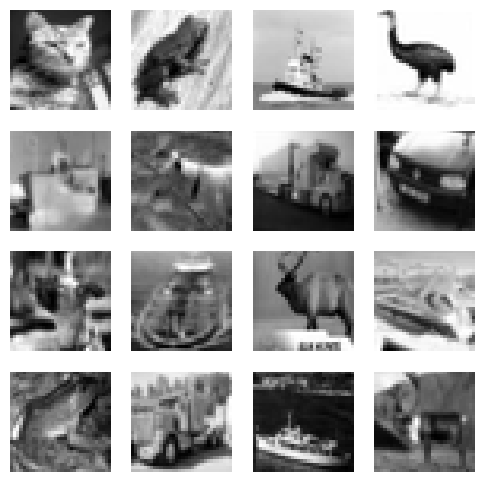

In [9]:
image ,target = next(iter(train_dl))
plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(image[i,0], cmap='gray')
    plt.axis('off')
plt.show()

In [27]:
class CNN (nn.Module):
    def __init__(self,input_channel=3, num_classes=10):
        super(CNN,self).__init__()
        self.conv1=nn.Conv2d(in_channels=input_channel, out_channels=16, kernel_size=(3,3), padding=(1,1))
        self.conv2=nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3,3), padding=(1,1))
        self.conv3=nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3,3), padding=(1,1))
        self.pool=nn.MaxPool2d(kernel_size=(2,2))

        self.fc1=nn.Linear(in_features=16*16*64, out_features=num_classes )
   
    def forward(self,x):
        out=self.conv1(x)
        out=self.conv2(out)
        out=self.pool(out)
        out=self.conv3(out)
        out=out.reshape(out.shape[0],-1)
        out=self.fc1(out)
        return out

In [25]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [28]:
model=CNN().to(device)
model

CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=16384, out_features=10, bias=True)
)

In [29]:
optimizer= optim.SGD(model.parameters(), lr=0.01)

In [30]:
criterion = nn.CrossEntropyLoss() 

In [31]:
epochs=20 

for i in range(epochs): 
    sumloss=0
    for idx, (image,label) in enumerate(train_dl): 
        image=image.to(device)
        label=label.to(device)
        
        optimizer.zero_grad()
        score=model(image)
        loss=criterion(score ,label)
        sumloss+=loss
        loss.backward()
        optimizer.step()
    print(f'loss in epoch {i+1} is equal to {sumloss}')

loss in epoch 1 is equal to 5217.26025390625
loss in epoch 2 is equal to 4137.57568359375
loss in epoch 3 is equal to 3673.036376953125
loss in epoch 4 is equal to 3418.890625
loss in epoch 5 is equal to 3254.334716796875
loss in epoch 6 is equal to 3139.381591796875
loss in epoch 7 is equal to 3036.5107421875
loss in epoch 8 is equal to 2954.054931640625
loss in epoch 9 is equal to 2858.149169921875
loss in epoch 10 is equal to 2788.341552734375
loss in epoch 11 is equal to 2699.62353515625
loss in epoch 12 is equal to 2632.134033203125
loss in epoch 13 is equal to 2562.6533203125
loss in epoch 14 is equal to 2489.25830078125
loss in epoch 15 is equal to 2418.0615234375
loss in epoch 16 is equal to 2367.23291015625
loss in epoch 17 is equal to 2302.393798828125
loss in epoch 18 is equal to 2230.453369140625
loss in epoch 19 is equal to 2183.107421875
loss in epoch 20 is equal to 2120.78076171875


In [32]:
def checkaccuracy (dataloader, model): 
    if dataloader.dataset.train : 
        print('Accuracy on train data')
    else:
        print('Accuracy on test data')
    
    num_correct=0
    num_samples=0

    model.eval()

    with torch.no_grad():
        for x,y in dataloader:
            x=x.to(device)
            y=y.to(device)

            
            score=model(x)

            _,pred=score.max(1)
            num_correct+=(pred==y).sum()
            num_samples+=len(y)

        print(f'accuracy is equal to {num_correct/num_samples} ')
    model.train()

In [33]:
checkaccuracy(train_dl, model)

Accuracy on train data
accuracy is equal to 0.8158599734306335 


In [34]:
checkaccuracy(test_dl, model)

Accuracy on test data
accuracy is equal to 0.611299991607666 
